<a href="https://colab.research.google.com/github/ahmad123576/Deep-Learning/blob/main/data_augmentation_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import os
import PIL
import cv2


In [20]:
# load flower dataset again to ensure correct path
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache dir indicates where to download data
# untar true unzip it

In [21]:
data_dir

'./datasets/flower_photos'

In [22]:
# convert data_dir(string) to path
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [25]:
list(data_dir.glob('*/*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/flower_photos/dandelion/2502610598_b9f1b55ebd_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/dandelion/139124974_9e3ba69f6c.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/dandelion/4714026966_93846ddb74_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/dandelion/8475769_3dea463364_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/dandelion/7262863194_682209e9fb.jpg')]

In [26]:
img_count = len(list(data_dir.glob('*/*/*.jpg')))
img_count

3670

In [28]:
roses = list(data_dir.glob('*/roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/3921794817_276eb4386b.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5840476802_dfa40deb1f_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/12238827553_cf427bfd51_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/17702388233_f29dc14834_m.jpg')]

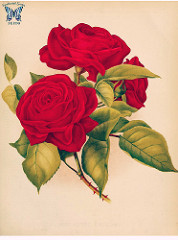

In [32]:
PIL.Image.open(roses[1])

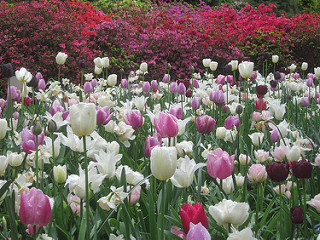

In [41]:
# lets open tulip
tulips = list(data_dir.glob('*/tulips/*'))
PIL.Image.open(tulips[9])

In [42]:
# read flower images from disk into numpy array using opencv
flowers_img_dict={
    'roses':list(data_dir.glob('*/roses/*')),
    'daisy':list(data_dir.glob('*/daisy/*')),
    'dandelion':list(data_dir.glob('*/dandelion/*')),
    'sunflowers':list(data_dir.glob('*/sunflowers/*')),
    'tulips':list(data_dir.glob('*/tulips/*')),
}

flowers_label_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}


In [44]:
flowers_img_dict['roses'][:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/3921794817_276eb4386b.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5840476802_dfa40deb1f_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/12238827553_cf427bfd51_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/17702388233_f29dc14834_m.jpg')]

In [48]:
str(flowers_img_dict['roses'][0])

'datasets/flower_photos/flower_photos/roses/3921794817_276eb4386b.jpg'

In [49]:
# convert images into 3 dimensional array
img=cv2.imread(str(flowers_img_dict['roses'][0]))

In [50]:
img.shape

(377, 500, 3)

In [51]:
# resize image in 180*180
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [52]:
X, y = [], []

for flower_name, images in flowers_img_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_label_dict[flower_name])

In [53]:
X=np.array(X)
y=np.array(y)

In [54]:
# train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [55]:
# scale images
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [57]:
# build cnn and train it
num_classes = 5

cnn = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

cnn.fit(X_train_scaled, y_train, epochs=30)


Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.2559 - loss: 2.1672
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4641 - loss: 1.3061
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6428 - loss: 0.9382
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7379 - loss: 0.6677
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8799 - loss: 0.4026
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9316 - loss: 0.2181
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9495 - loss: 0.1619
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9739 - loss: 0.0913
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9741 - loss: 0.0917
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9872 - loss: 0.0509
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9907 - loss: 0.0345
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy:

In [58]:
cnn.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5754 - loss: 3.7078


[3.8738412857055664, 0.5773420333862305]

In [82]:
# we saw that accuracy is almost 1 but test accuracy is 57%, so our model is overfit, we have to solve this
# use data augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(height_factor=0.5, width_factor=0.1),
    # rescale to [0,255] for display
    layers.Rescaling(255.0/255)
])

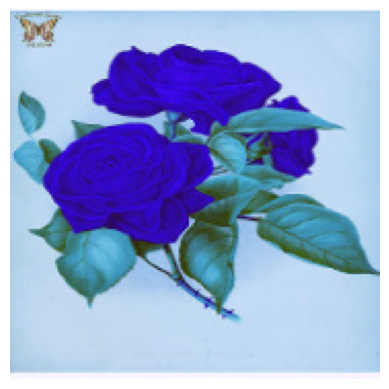

In [83]:
# ORIGINAL IMAGE
plt.axis('off')
plt.imshow(X[1])

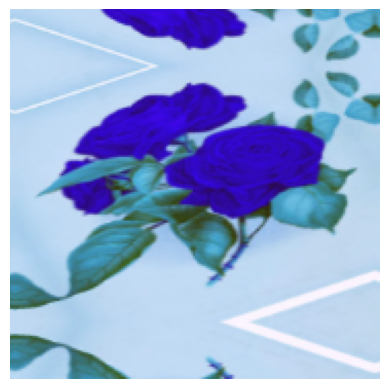

In [87]:
# newly generated transformed image using da
plt.axis('off')
plt.imshow(data_augmentation(X)[1].numpy().astype('uint8'))

In [88]:
# train model using da annd dropout
num_classes = 5
cnn = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

cnn.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.3124 - loss: 1.5675
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5148 - loss: 1.1227
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6247 - loss: 0.9645
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.6416 - loss: 0.9156
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6819 - loss: 0.8601
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6965 - loss: 0.8028
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6933 - loss: 0.8026
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7097 - loss: 0.7608
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7298 - loss: 0.7220
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7349 - loss: 0.7060
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7501 - loss: 0.6913
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy:

In [89]:
cnn.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6973 - loss: 0.9338


[0.9215812087059021, 0.7026143670082092]

In [90]:
# now test accuracy is 72 and train has 84